In [1]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import jax
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score
from pennylane.optimize import AdamOptimizer,QNSPSAOptimizer
from scipy.optimize import minimize
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")
from autoencoder import Autoencoder



# Use the class


In [2]:
from autoencoder import Autoencoder

epochs= 20
n= 111
opt=AdamOptimizer(stepsize=.2)
X=np.random.rand(n)
np.random.shuffle(X)
n_trash_qubit=1
n_qubit_autoencoder=2
n_qubit=n_qubit_autoencoder+n_trash_qubit+1 

ae = Autoencoder('fd',n_qubit_autoencoder,n_trash_qubit,qml.device('default.qubit', wires=n_qubit, shots=None))
history = ae.train(X,opt,epochs)


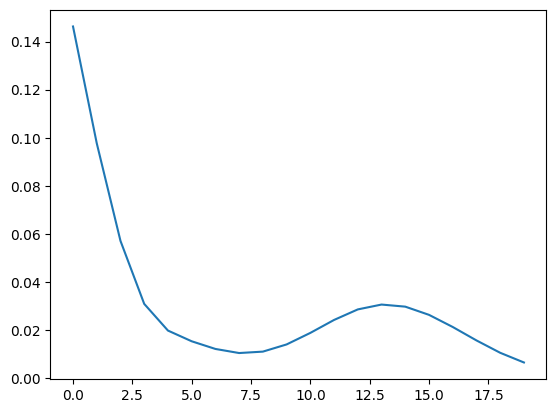

In [3]:
ae.plot_loss()

## Swap test for the dimentionality reduced state

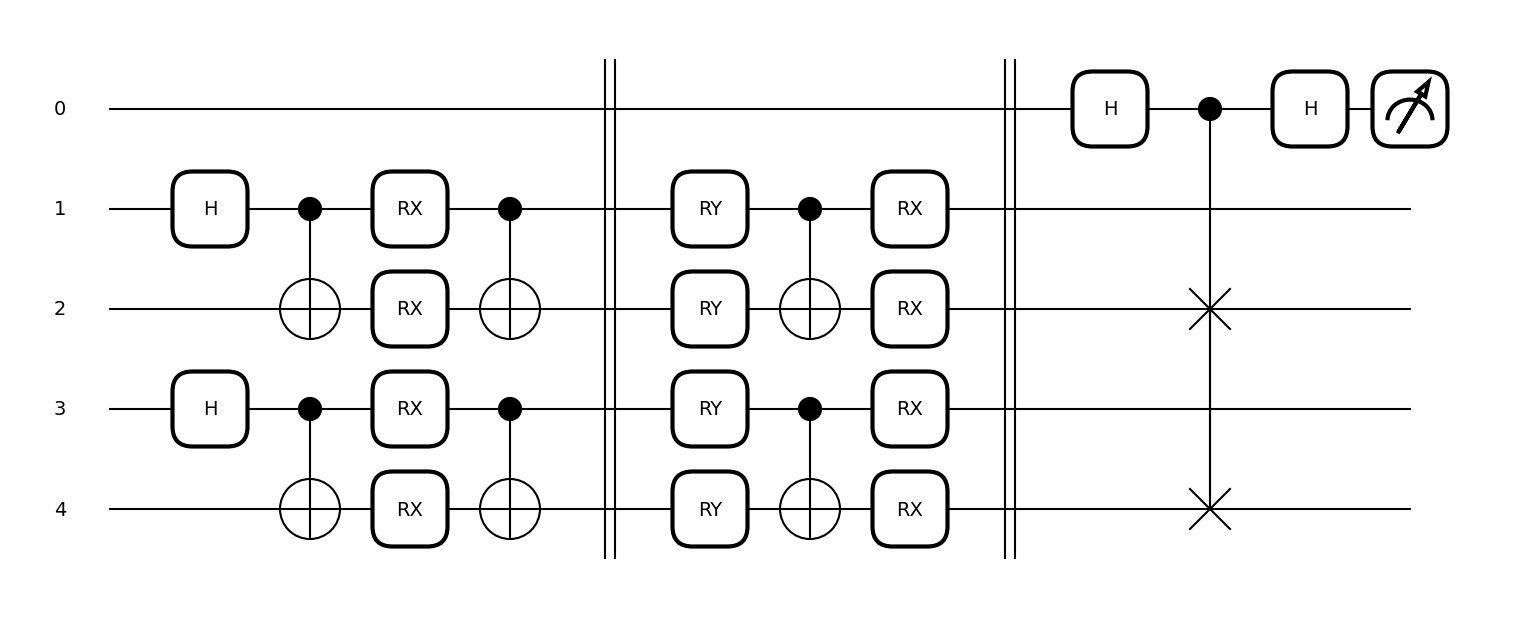

In [69]:
@qml.qnode(qml.device('default.qubit', wires=5, shots=10000))
def pio(param):
    isotropic_state(param[0],[1,2])
    isotropic_state(param[1],[3,4])
    
    qml.Barrier()
    ae.get_cirq(1)
    ae.get_cirq(3)

    qml.Barrier()
    original_swap([(2,4)])
    return qml.probs([0])

fig, ax = qml.draw_mpl(pio)([1,2])
plt.show()


## Swap test for the initial state

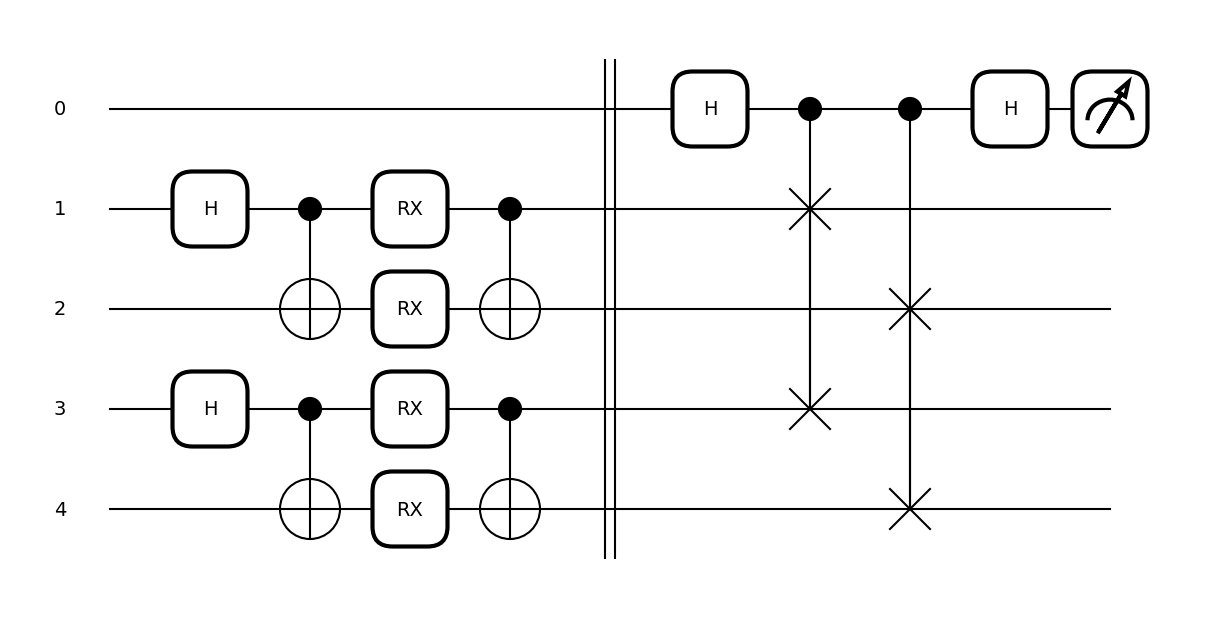

In [70]:
@qml.qnode(qml.device('default.qubit', wires=5, shots=10000))
def pio2(param):
    isotropic_state(param[0],[1,2])
    isotropic_state(param[1],[3,4])
    
    qml.Barrier()
    original_swap([(1,3),(2,4)])
    return qml.probs([0])

fig, ax = qml.draw_mpl(pio2)([1,2])
plt.show()


MSE of the error is 4.6020400000000024e-05


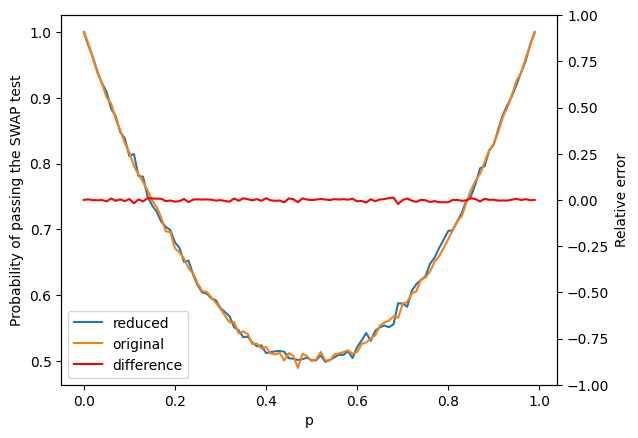

In [73]:
c1=[]
c2=[]
for a in np.linspace(0,1,100):
    res1 = pio([a,0])
    res2 = pio2([a,0])
    c1.append(res1[0])
    c2.append(res2[0])

fig, ax = plt.subplots()
ax2 = ax.twinx()

lns1=ax.plot( np.array(range(len(c1)))/100,c1,label=['reduced'])
lns2=ax.plot( np.array(range(len(c2)))/100,c2,label=['original'])
errors = np.array(c2)-np.array(c1)
lns3=ax2.plot( np.array(range(len(c2)))/100,errors,label=['difference'],color='red')
from sklearn.metrics import mean_squared_error as mse 
print(f'MSE of the error is {mse(c1,c2)}')
ax2.set_ylim([-1,1])
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_xlabel("p")
ax.set_ylabel(r"Probability of passing the SWAP test")
ax2.set_ylabel(r"Relative error")
plt.show();